**Université bretagne occidentale**

*Faculté des Sciences et Technologies*

**Spécialité :** Informatique

**Module :** Méthode computationnelle

**Projet :** Résolution du Problème du Voyageur de Commerce avec la méthode recuit simulé

**Année Universitaire :** 2023-2024

---

**Présenté par :**

* Boulmaali Linda Imene
* Miszczuk Ivan 


---

*Date de Soumission : 15 mars 2024*

# Introduction

Dans la première partie du projet sur les problèmes combinatoires, nous avions mis en œuvre l'algorithme immunitaire pour résoudre le problème du voyageur de commerce.

Dans cette deuxième partie du projet, nous allons explorer la méthode du recuit simulé et l'implémenter pour résoudre le même problème du voyageur de commerce. Nous allons évaluer cette méthode en utilisant diverses stratégies pour la réduction de la température et la transformation du chemin. De plus, nous expérimenterons avec plusieurs valeurs de paramètres. En conclusion de ce rapport, nous comparerons les résultats obtenus en termes de coût et de temps d'exécution pour chaque approche.

# L’algorithme recuit simulé

En algorithmique, le recuit simulé est une méthode empirique (métaheuristique) d'optimisation, inspirée d'un processus, le recuit, utilisé en métallurgie. On alterne dans cette dernière des cycles de refroidissement lent et de réchauffage (recuit) qui ont pour effet de minimiser l'énergie du matériau.[[1]](https://fr.wikipedia.org/wiki/Recuit_simul%C3%A9)

#### pseudo code
s := s0

e := E(s)

k := 0

**tant que** k < kmax et e > emax

    sn := voisin(s)
  
    en := E(sn)
  
    **si** en < e ou aléatoire() < P(en - e, temp(k/kmax)) **alors**
  
        s := sn; e := en
    
    k := k + 1
  
**retourne** s

# Implementaion

- Nous avons implémenté la fonction `transformationChemin` avec trois versions différentes, comme cela a été vu dans la partie du projet précédent. Les versions incluent les méthodes d'échange, d'inversion et de translation utilisées pour la méthode `muteAc`.

- La fonction `g`, qui modifie la température, a été implémentée et testée en trois versions différentes :
    * fct1 = T * alpha
    * fct2 = T - alpha
    * fct3 = T/(1 + alpha * T), tel que "T" représente la température et alpha le paramètre de refroidissement qui varie entre 0.85 et 1.

- Enfin, nous avons complété l'algorithme du recuit simulé, tel que présenté dans le dossier "Fonction" du projet.

- Dans le code C, nous avons ajouté des arguments pour permettre le changement des types de méthodes. L'exécution se fait via une commande prenant en compte un type pour la méthode de mutation (échange: 1, inversion: 2, translation: 3) et un type pour la fonction de température (fct1: 1, fct2: 2, fct3: 3).

- Nous avons également développé un script Python pour exécuter plusieurs fois le `programme.c`, en calculant au passage le temps d'exécution.

**Caractéristiques de la machine de test :**

AMD Ryzen 7 5800X 8-Core Processor



# Evaluation et Analyse des résultats



- Pour 8 et 16 villes, le programme a été exécuté 5000 fois chacun. Pour 30 villes, il a été exécuté 7645 fois, et pour 100 villes, le programme a été exécuté 4453 fois, totalisant ainsi 22098 essais.

- Les paramètres ont été générés de manière aléatoire dans les plages suivantes :

    * tInit = random.randint(800, 4000)
    * tFin = random.uniform(0.01, 0.02)
    * alpha = random.uniform(0.8, 1.0)
    * amplitude = random.randint(nbVille // 10, nbVille // 4)
    * MaxRepetitions = random.randint(100, 2500)
    * type_mutation: entre(échange: 1, inversion: 2, translation: 3)
    * type_modification_temperature: entre (fct1: 1, fct2: 2, fct3: 3)


## Analyse des données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Chargement des résultats
file_path = "../data/resultats.csv" # résultat pour 8 villes 
data = pd.read_csv(file_path)

# Creation des dataframes
df = pd.DataFrame(data)

In [3]:
df.head(10) # permet d'afficher les 10 première valeurs dans df_100

,nb_ville,type_modification_temperature,type_mutation,temperature_initiale,temperature_finale,alpha,amplitude,max_repetition,temperature_fin_exec,cout,temps_execution
0,30,1,3,3146,0.016,0.910,3,827,0.015,49.26,0.177
1,30,1,2,3952,0.017,0.893,4,1655,0.016,49.09,0.184
2,30,1,1,914,0.014,0.906,6,2184,0.013,52.40,0.210
3,30,1,1,1929,0.012,0.856,7,356,0.010,57.31,0.043
4,30,1,1,1021,0.018,0.960,4,1290,0.017,52.95,0.287
5,30,1,2,3261,0.019,0.895,7,895,0.018,55.57,0.124
6,30,1,2,3048,0.014,0.879,3,1960,0.013,50.41,0.152
7,30,1,1,1940,0.012,0.979,5,514,0.012,50.41,0.333
8,30,1,1,3617,0.015,0.874,3,792,0.013,56.04,0.067
9,30,1,1,1596,0.018,0.855,4,964,0.017,49.45,0.062


In [4]:
# Suppression des lignes dupliquées
df.drop_duplicates(inplace=True)

In [5]:
df.info() # affiche les informations concernant le dataframe df_100

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22098 entries, 0 to 22097
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   nb_ville                       22098 non-null  int64  
 1   type_modification_temperature  22098 non-null  int64  
 2   type_mutation                  22098 non-null  int64  
 3   temperature_initiale           22098 non-null  int64  
 4   temperature_finale             22098 non-null  float64
 5   alpha                          22098 non-null  float64
 6   amplitude                      22098 non-null  int64  
 7   max_repetition                 22098 non-null  int64  
 8   temperature_fin_exec           22098 non-null  float64
 9   cout                           22098 non-null  float64
 10  temps_execution                22098 non-null  float64
dtypes: float64(5), int64(6)
memory usage: 2.0 MB


In [6]:
# Lets check the dimension of the data set 
print(df.shape) # affiche la dimension de df_30, nous avons tester 500 combinaisons de paramètre differents.

(22098, 11)


In [7]:
print(df.columns) # affiche les colonnes de notre dataframe

Index(['nb_ville', 'type_modification_temperature', 'type_mutation',
       'temperature_initiale', 'temperature_finale', 'alpha', 'amplitude',
       'max_repetition', 'temperature_fin_exec', 'cout', 'temps_execution'],
      dtype='object')


In [8]:
# Create a DataFrame for only 8 villes
df_8 = df[df['nb_ville'] == 8].reset_index(drop=True)
# Create a DataFrame for only 16 villes
df_16 = df[df['nb_ville'] == 16].reset_index(drop=True)
# Create a DataFrame for only 30 villes
df_30 = df[df['nb_ville'] == 30].reset_index(drop=True)
# Create a DataFrame for only 100 villes
df_100 = df[df['nb_ville'] == 100].reset_index(drop=True)


In [9]:
# Attributs qualitatifs
attributs_qualitatifs = ['nb_ville', "type_modification_temperature", "type_mutation", "temperature_fin_exec"]

# Sélectionner toutes les colonnes sauf 'type_mutation' et 'type_modification_temperature'
df_subset_8 = df_8.drop(columns=attributs_qualitatifs)
df_subset_16 = df_16.drop(columns=attributs_qualitatifs)
df_subset_30 = df_30.drop(columns=attributs_qualitatifs)
df_subset_100 = df_100.drop(columns=attributs_qualitatifs)

#### Pour 8 villes 

In [10]:
# cette commande génère un résumé statistique des données contenues dans le DataFrame df_subset_8.
df_subset_8.describe() 

,temperature_initiale,temperature_finale,alpha,amplitude,max_repetition,cout,temps_execution
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00,5000.000000
mean,2894.560600,0.015003,0.923188,0.991400,1319.119800,17.89,0.216493
std,1210.353518,0.002905,0.043028,0.814284,695.339157,0.00,0.529369
min,800.000000,0.010000,0.850000,0.000000,101.000000,17.89,0.018000
25%,1868.500000,0.012000,0.886000,0.000000,719.000000,17.89,0.061000
50%,2889.000000,0.015000,0.923000,1.000000,1348.000000,17.89,0.092000
75%,3929.250000,0.017000,0.960000,2.000000,1907.000000,17.89,0.165000
max,5000.000000,0.020000,0.999000,2.000000,2500.000000,17.89,9.894000


Nous pouvons remarquer que le coût minimum est : 17.89

#### Pour 16 villes

In [11]:
# cette commande génère un résumé statistique des données contenues dans le DataFrame df_subset_16.
df_subset_16.describe() 

,temperature_initiale,temperature_finale,alpha,amplitude,max_repetition,cout,temps_execution
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2893.870600,0.014957,0.924298,2.506800,1318.034600,19.348066,0.348715
std,1207.398064,0.002888,0.042920,1.108783,684.320795,0.292656,0.980384
min,800.000000,0.010000,0.850000,1.000000,101.000000,19.310000,0.019000
25%,1854.500000,0.013000,0.886000,2.000000,734.750000,19.310000,0.086000
50%,2851.500000,0.015000,0.924000,3.000000,1330.000000,19.310000,0.135000
75%,3958.000000,0.017000,0.961000,3.000000,1898.500000,19.310000,0.253000
max,5000.000000,0.020000,0.999000,4.000000,2500.000000,24.520000,23.524000


Nous pouvons remarquer que le coût minimum est : 19.31

#### 30 villes

In [12]:
df_subset_30.describe() 

,temperature_initiale,temperature_finale,alpha,amplitude,max_repetition,cout,temps_execution
count,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000
mean,2829.749509,0.117597,0.924965,5.016089,1297.989666,55.829409,1.161515
std,1273.787203,0.236644,0.043169,1.408607,687.947994,10.353136,2.894671
min,103.000000,0.000600,0.850000,3.000000,100.000000,46.370000,0.015000
25%,1747.000000,0.013000,0.887000,4.000000,700.000000,49.140000,0.119000
50%,2832.000000,0.016000,0.925000,5.000000,1303.000000,51.910000,0.245000
75%,3922.000000,0.019800,0.962000,6.000000,1878.000000,58.270000,0.695000
max,5000.000000,0.999900,1.000000,7.000000,2500.000000,108.550000,65.564000


Nous pouvons remarquer que le coût minimum est : 46.37

#### 100 villes

In [13]:
df_subset_100.describe() 

,temperature_initiale,temperature_finale,alpha,amplitude,max_repetition,cout,temps_execution
count,4453.000000,4453.000000,4453.000000,4453.000000,4453.000000,4453.000000,4453.000000
mean,2887.956658,0.024658,0.924386,17.374354,1285.061981,193.340052,10.984222
std,1227.184399,0.075708,0.043469,4.630385,688.688663,56.356102,36.616576
min,108.000000,0.006900,0.850000,10.000000,100.000000,103.070000,0.020000
25%,1835.000000,0.012700,0.886000,13.000000,696.000000,154.320000,0.474000
50%,2886.000000,0.015000,0.924000,17.000000,1263.000000,175.810000,1.432000
75%,3941.000000,0.018000,0.962000,21.000000,1889.000000,216.520000,6.498000
max,5000.000000,0.999700,1.000000,25.000000,2500.000000,441.850000,751.325000


Nous pouvons remarquer que le coût minimum est : 103.07

<Figure size 1080x720 with 0 Axes>

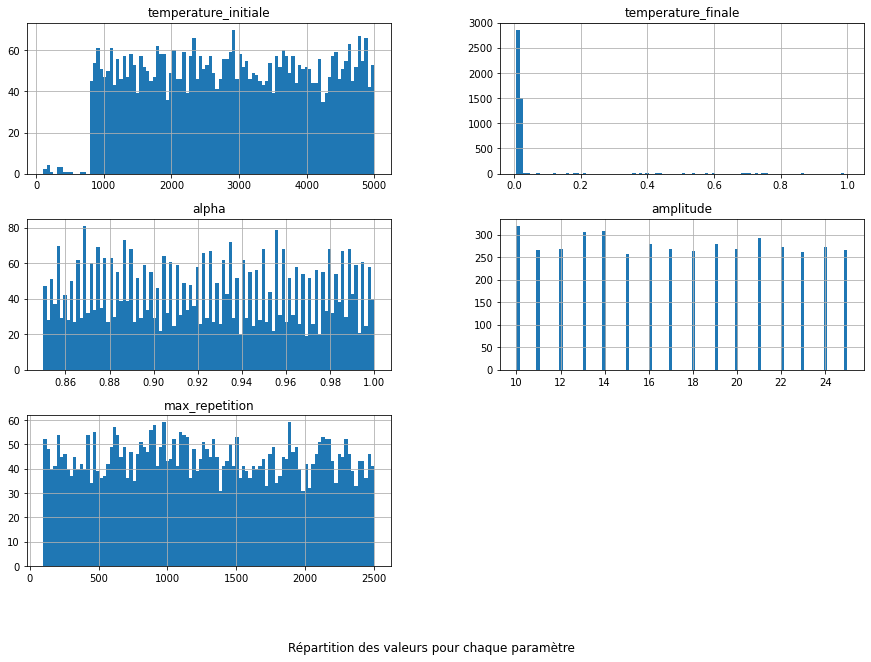

In [16]:
# Sélectionner toutes les colonnes sauf 'cout' et 'temps_execution'
df_100_dist = df_100.drop(columns=['cout', 'temps_execution']+attributs_qualitatifs)

# Dessiner des histogrammes pour les variables numériques de df_100
plt.figure(figsize=(15, 10))
df_100_dist.hist(bins=100, figsize=(15, 10))
plt.suptitle('Répartition des valeurs pour chaque paramètre', y=0.02)
plt.show()

Comme illustré par les graphiques, nous avons systématiquement varié les valeurs de nos paramètres de manière aléatoire afin d'évaluer leur impact sur le coût. Cette approche nous a permis d'explorer de manière exhaustive l'influence de chaque paramètre sur les résultats obtenus.

## Analyse du coût et du temps d'exécution par rapport aux paramètres : tInit, tFin, alpha,  amplitude, MaxRepetitions.

Un scatter plot est un graphique qui représente la distribution de deux variables en affichant les points de données selon leurs coordonnées, permettant ainsi de visualiser les relations et tendances entre ces variables.

#### 8 villes

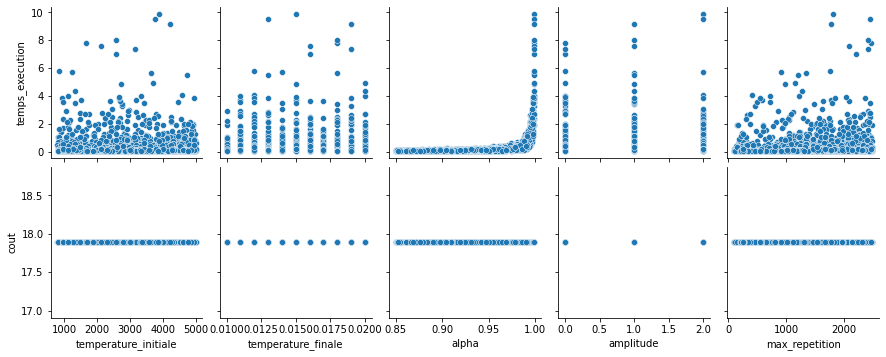

In [181]:
# Pairwise Scatter Plots with temps_execution on the y-axis
sns.pairplot(df_8, x_vars=["temperature_initiale","temperature_finale","alpha","amplitude", "max_repetition"],
             y_vars=['temps_execution', 'cout'], kind='scatter')
plt.show()

#### 16 villes

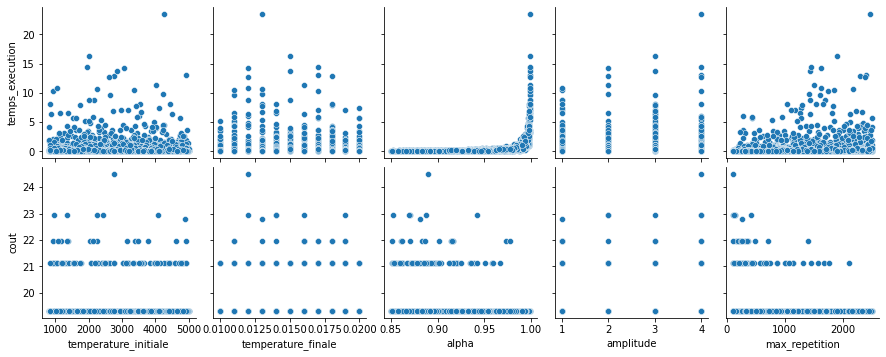

In [182]:
sns.pairplot(df_16, x_vars=["temperature_initiale","temperature_finale","alpha","amplitude", "max_repetition"],
             y_vars=['temps_execution', 'cout'], kind='scatter')
plt.show()

#### 30 villes

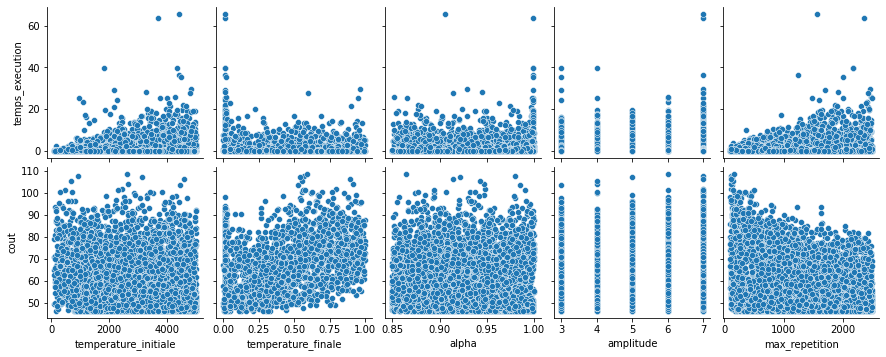

In [183]:
sns.pairplot(df_30, x_vars=["temperature_initiale","temperature_finale","alpha","amplitude", "max_repetition"],
             y_vars=['temps_execution', 'cout'], kind='scatter')
plt.show()

#### 100 villes

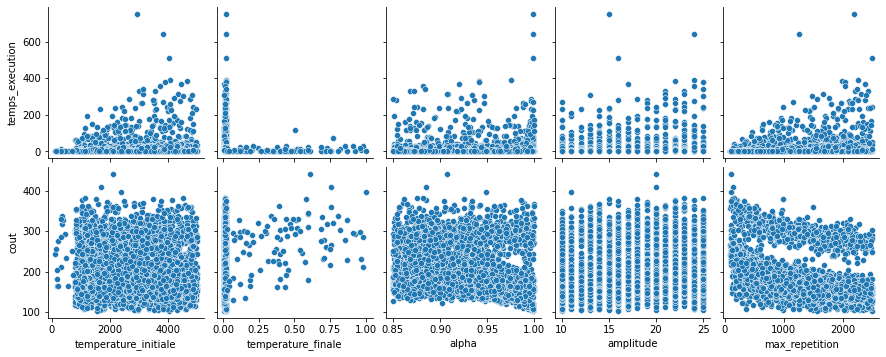

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df_100, x_vars=["temperature_initiale","temperature_finale","alpha","amplitude", "max_repetition"],
             y_vars=['temps_execution', 'cout'], kind='scatter')
plt.show()

#### Nous observons :

- Avec 8 et 16 villes, nous ne pouvons pas vraiment observer l'impact des changements des paramètres.
- À partir de 30 villes, nous pouvons observer certaines tendances et l'impact de certains paramètres sur le coût et le temps d'exécution. Parmi les tendances que nous pouvons remarquer :

  - Une température initiale élevée, à partir de 1000, augmente les chances d'avoir de meilleures performances en termes de coût et augmente légèrement le temps d'exécution.
  - Pour une température finale entre 0,01 et 0,02, nous obtenons une performance en termes de coût et de temps d'exécution assez satisfaisante.
  - Augmenter la valeur de alpha (entre 0.85 et 1) améliore la performance du coût mais augmente légèrement le temps d'exécution.
  - La valeur de l'amplitude utilisée dépend généralement du nombre de villes. Dans notre cas, nous prenons une amplitude entre nbVille / 10 et nbVille / 4. Une valeur se rapprochant plus de nbVille / 10 donne généralement de bonnes performances en termes de coût et de temps d'exécution.
  - Augmenter le nombre de répétitions influe énormément sur la performance du coût et cela dépend principalement de nombre de villes. Nous observons une amélioration du coût dès que nous augmentons le nombre de répétitions, et cela affecte que légèrement le temps d'exécution.

- Avec 100 villes, nous confirmons l'influence des paramètres et les résultats obtenus avec 30 villes.


### Analyse du coût et du temps d'exécution par rapport aux méthodes type_mutation et type_modification_temperature en utilisant les boîtes à moustaches

Les boîtes à moustaches (boxplots) fournissent une visualisation synthétique de la distribution et de la dispersion des données, mettant en évidence les quartiles, les médianes et les valeurs aberrantes dans un ensemble de données.

Avec seulement 8 et 16 villes, il est difficile de déterminer la méthode qui offre les meilleurs résultats en termes de coût et de temps d'exécution. Nous évaluons donc les performances sur 30 et 100 villes.

#### 30 villes : 

#### Couts : 

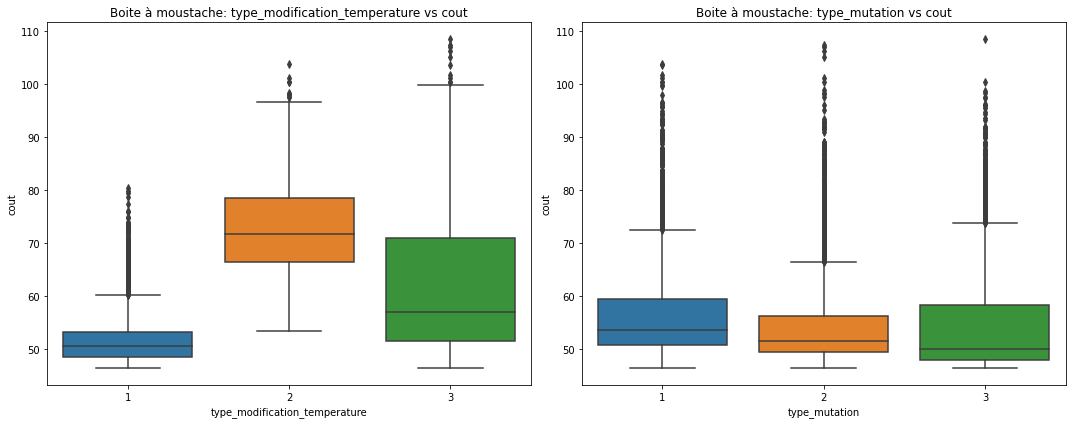

In [206]:
plt.figure(figsize=(15, 6))
for i, column in enumerate(["type_modification_temperature", "type_mutation"]):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(x=column, y='cout', data=df_30)
    plt.title(f'Boite à moustache: {column} vs cout')

plt.tight_layout()
plt.show()

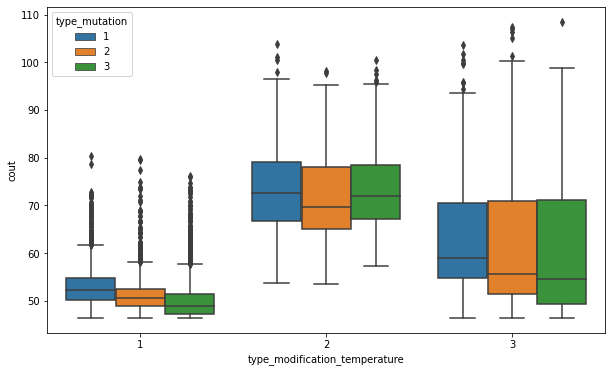

In [207]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type_modification_temperature', y='cout', hue='type_mutation', data=df_30)
plt.show()

#### Temps d'execution : 

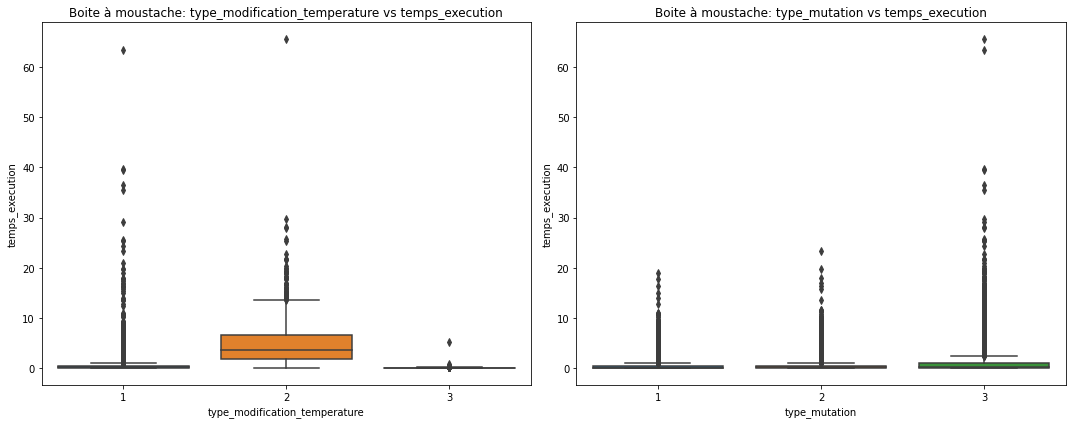

In [208]:
plt.figure(figsize=(15, 6))
for i, column in enumerate(["type_modification_temperature", "type_mutation"]):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(x=column, y='temps_execution', data=df_30)
    plt.title(f'Boite à moustache: {column} vs temps_execution')

plt.tight_layout()
plt.show()

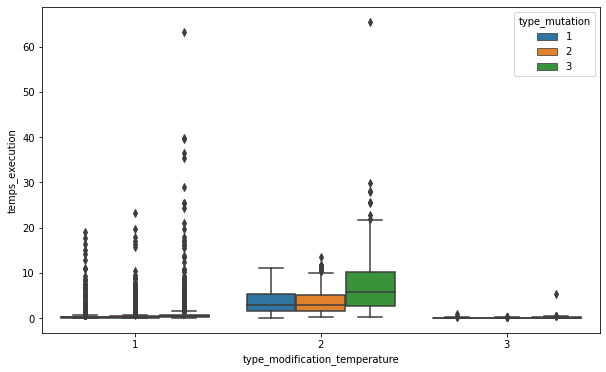

In [209]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type_modification_temperature', y='temps_execution', hue='type_mutation', data=df_30)
plt.show()

#### 100 villes : 

### cout : 

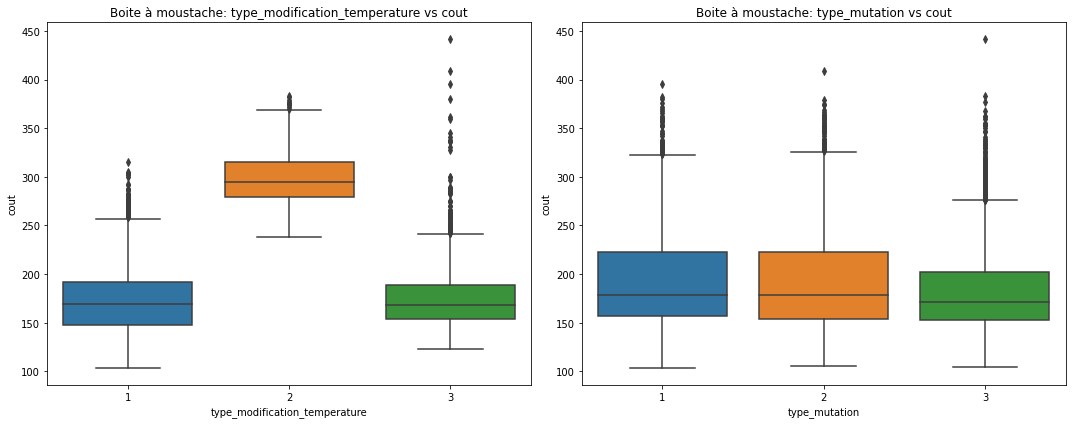

In [210]:
# Display boxplots after removing outliers
plt.figure(figsize=(15, 6))
for i, column in enumerate(["type_modification_temperature", "type_mutation"]):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(x=column, y='cout', data=df_100)
    plt.title(f'Boite à moustache: {column} vs cout')

plt.tight_layout()
plt.show()

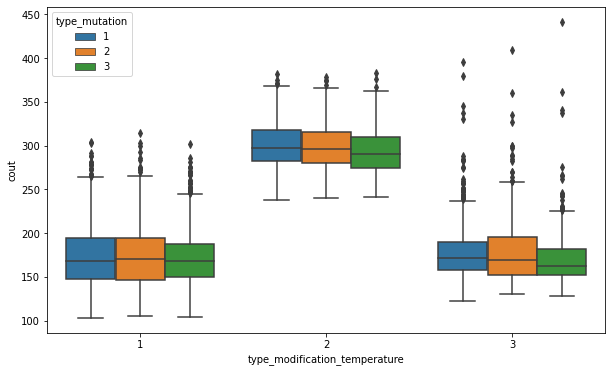

In [211]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type_modification_temperature', y='cout', hue='type_mutation', data=df_100)
plt.show()

- Nous constatons qu'avec 30 et 100 villes, la méthode de translation utilisée pour la transformation du chemin donne de meilleurs résultats par rapport aux méthodes d'échange et d'inversion.
- La fonction T * alpha donne généralement aussi les meilleurs résultats.
- Nous observons aussi que la combinaison de la méthode de translation (3) et de modification de température (1) est généralement la plus performante en termes de coût.

#### Temps d'execution : 

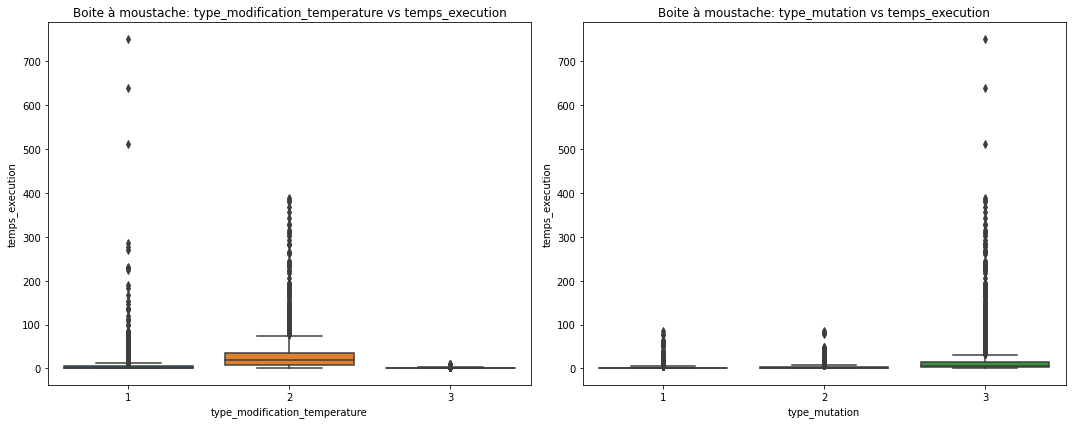

In [212]:
# Display boxplots after removing outliers
plt.figure(figsize=(15, 6))
for i, column in enumerate(["type_modification_temperature", "type_mutation"]):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(x=column, y='temps_execution', data=df_100)
    plt.title(f'Boite à moustache: {column} vs temps_execution')

plt.tight_layout()
plt.show()

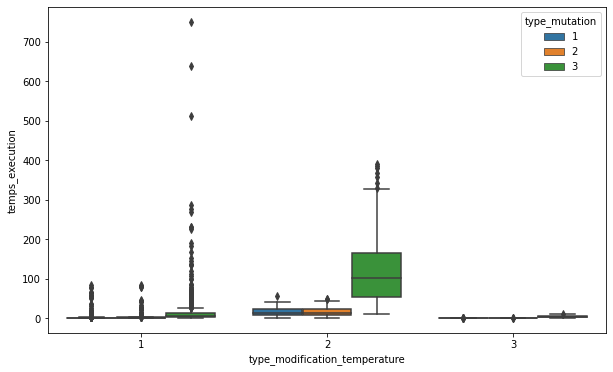

In [213]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type_modification_temperature', y='temps_execution', hue='type_mutation', data=df_100)
plt.show()

- Toutes les versions de la fonction `transformationChemin` ont presque le même temps d'exécution, qui est assez négligeable, légèrement plus coûteux pour la méthode de translation.
- Cependant, comme nous pouvons l'observer, la deuxième fonction utilisée pour modifier la température consomme beaucoup de temps comparé aux deux autres fonctions.

## Analyse du coût et du temps d'exécution par rapport au nombre de max_repetition pour chaque méthode type_mutation et type_modification_temperature

#### 30 villes :

#### Cout : 

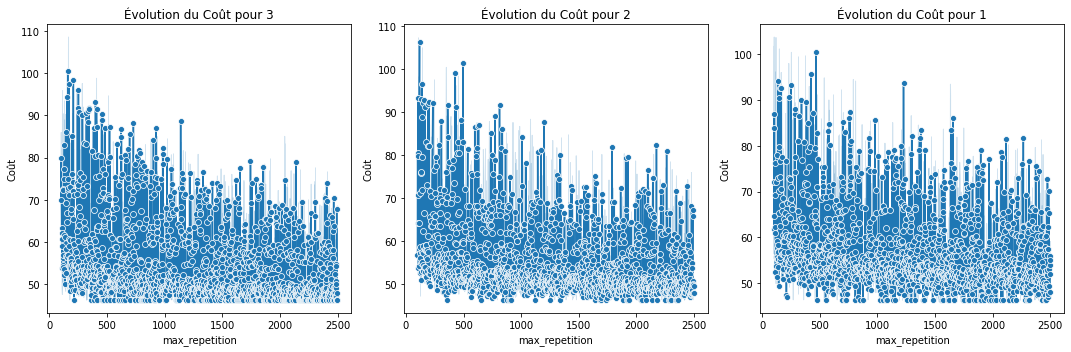

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer un diagramme de lignes pour chaque méthode
methods = df_30['type_mutation'].unique()

plt.figure(figsize=(15, 5))

for i, method in enumerate(methods):
    plt.subplot(1, len(methods), i + 1)
    
    # Filter data for the current method
    method_data = df_30[df_30['type_mutation'] == method]
    
    # Create a line plot
    sns.lineplot(x='max_repetition', y='cout', data=method_data, marker='o')
    
    # Set titles and labels
    plt.title(f'Évolution du Coût pour {method}')
    plt.xlabel('max_repetition')
    plt.ylabel('Coût')

plt.tight_layout()
plt.show()


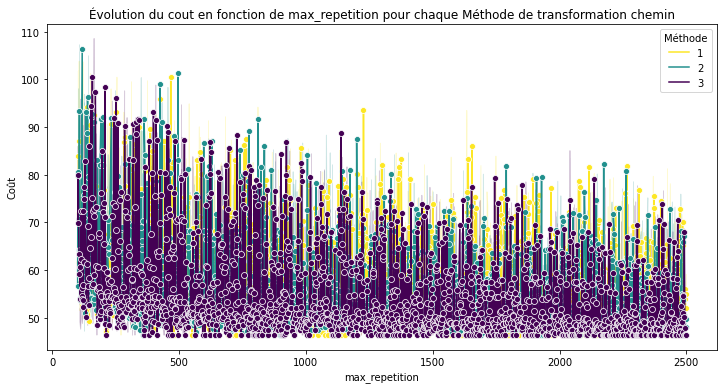

In [215]:
# Créer un diagramme de lignes
plt.figure(figsize=(12, 6))
sns.lineplot(x='max_repetition', y='cout', hue='type_mutation', data=df_30, marker='o', palette='viridis_r')

# Ajouter des titres et des légendes
plt.title('Évolution du cout en fonction de max_repetition pour chaque Méthode de transformation chemin')
plt.xlabel('max_repetition')
plt.ylabel('Coût')
plt.legend(title='Méthode')

# Afficher le diagramme de lignes
plt.show()

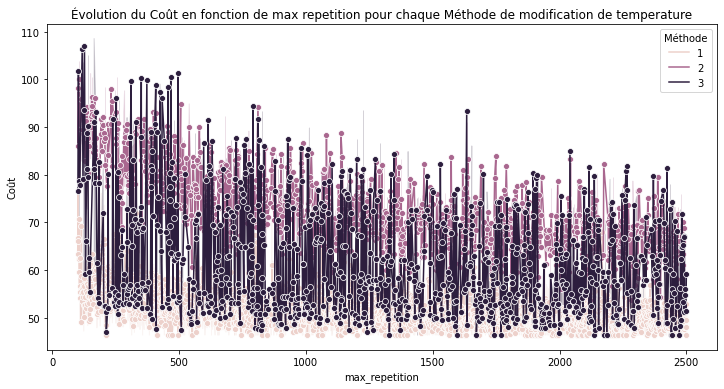

In [216]:
# Créer un diagramme de lignes
plt.figure(figsize=(12, 6))
sns.lineplot(x='max_repetition', y='cout', hue='type_modification_temperature', data=df_30, marker='o')

# Ajouter des titres et des légendes
plt.title('Évolution du Coût en fonction de max repetition pour chaque Méthode de modification de temperature')
plt.xlabel('max_repetition')
plt.ylabel('Coût')
plt.legend(title='Méthode')

# Afficher le diagramme de lignes
plt.show()

#### Temps d'execution

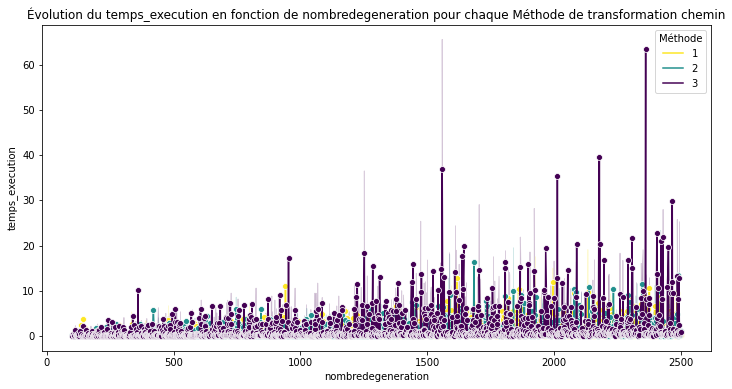

In [217]:
# Créer un diagramme de lignes
plt.figure(figsize=(12, 6))
sns.lineplot(x='max_repetition', y='temps_execution', hue='type_mutation', data=df_30, marker='o', palette='viridis_r')

# Ajouter des titres et des légendes
plt.title('Évolution du temps_execution en fonction de nombredegeneration pour chaque Méthode de transformation chemin')
plt.xlabel('nombredegeneration')
plt.ylabel('temps_execution')
plt.legend(title='Méthode')

# Afficher le diagramme de lignes
plt.show()

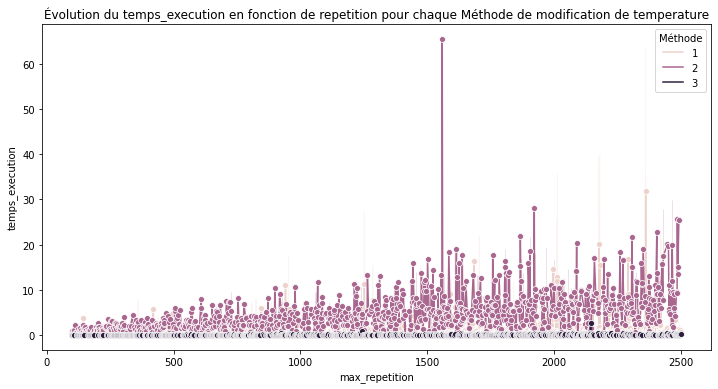

In [218]:
# Créer un diagramme de lignes
plt.figure(figsize=(12, 6))
sns.lineplot(x='max_repetition', y='temps_execution', hue='type_modification_temperature', data=df_30, marker='o')

# Ajouter des titres et des légendes
plt.title('Évolution du temps_execution en fonction de repetition pour chaque Méthode de modification de temperature')
plt.xlabel('max_repetition')
plt.ylabel('temps_execution')
plt.legend(title='Méthode')

# Afficher le diagramme de lignes
plt.show()

#### 100 villes : 

#### cout : 

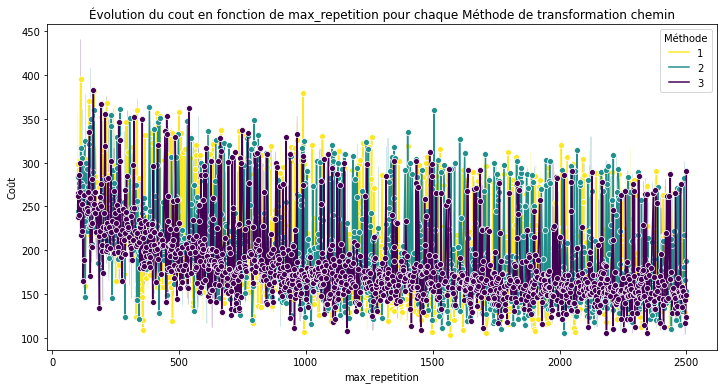

In [219]:
# Créer un diagramme de lignes
plt.figure(figsize=(12, 6))
sns.lineplot(x='max_repetition', y='cout', hue='type_mutation', data=df_100, marker='o', palette='viridis_r')

# Ajouter des titres et des légendes
plt.title('Évolution du cout en fonction de max_repetition pour chaque Méthode de transformation chemin')
plt.xlabel('max_repetition')
plt.ylabel('Coût')
plt.legend(title='Méthode')

# Afficher le diagramme de lignes
plt.show()

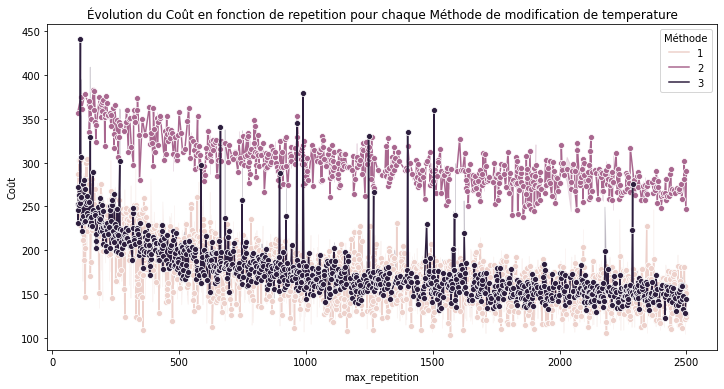

In [220]:
# Créer un diagramme de lignes
plt.figure(figsize=(12, 6))
sns.lineplot(x='max_repetition', y='cout', hue='type_modification_temperature', data=df_100, marker='o')

# Ajouter des titres et des légendes
plt.title('Évolution du Coût en fonction de repetition pour chaque Méthode de modification de temperature')
plt.xlabel('max_repetition')
plt.ylabel('Coût')
plt.legend(title='Méthode')

# Afficher le diagramme de lignes
plt.show()

#### Temps d'execution

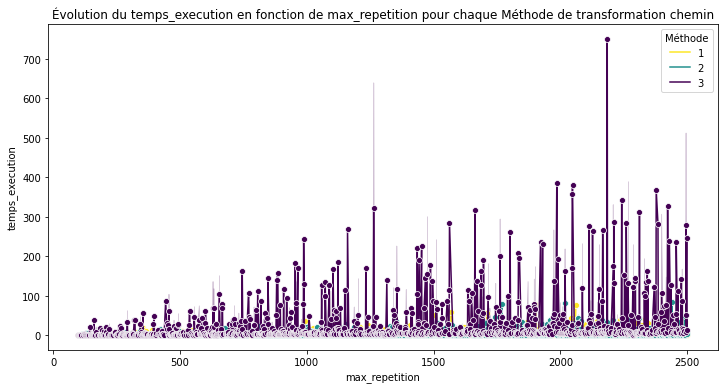

In [221]:
# Créer un diagramme de lignes
plt.figure(figsize=(12, 6))
sns.lineplot(x='max_repetition', y='temps_execution', hue='type_mutation', data=df_100, marker='o', palette='viridis_r')

# Ajouter des titres et des légendes

plt.title('Évolution du temps_execution en fonction de max_repetition pour chaque Méthode de transformation chemin')
plt.xlabel('max_repetition')
plt.ylabel('temps_execution')
plt.legend(title='Méthode')

# Afficher le diagramme de lignes
plt.show()

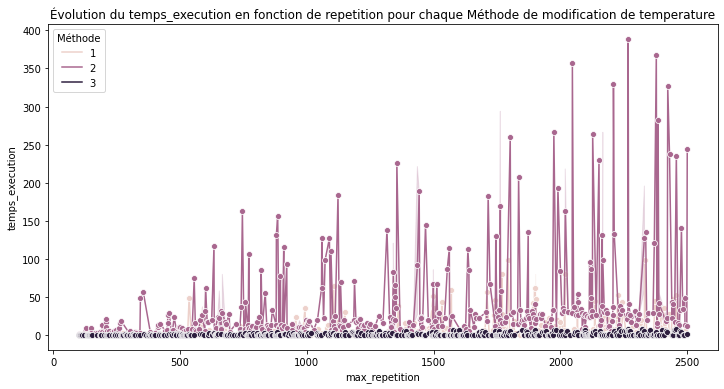

In [202]:
# Créer un diagramme de lignes
plt.figure(figsize=(12, 6))
sns.lineplot(x='max_repetition', y='temps_execution', hue='type_modification_temperature', data=df_100, marker='o')

# Ajouter des titres et des légendes
plt.title('Évolution du temps_execution en fonction de repetition pour chaque Méthode de modification de temperature')
plt.xlabel('max_repetition')
plt.ylabel('temps_execution')
plt.legend(title='Méthode')

# Afficher le diagramme de lignes
plt.show()

Dans ces lignes pour 16, 30 et 100 villes, plusieurs observations peuvent être faites :

**Performance en coût :**

- On observe plusieurs variations pour la valeur des coûts au fil de plusieurs itérations dans chaque méthode choisie.
- Nous confirmons à travers ces graphes que la méthode de translation (3) converge plus rapidement vers le meilleur coût, et cela s'applique aussi à la première fonction utilisée pour le refroidissement T * alpha.

**Performance en temps d'exécution :**

- La deuxième méthode utilisée pour le refroidissement est coûteuse en temps et augmente encore plus au fil du nombre de répétitions. Nous pouvons aussi le remarquer pour la méthode translation utilisée pour la transformation de chemin qui est cependant légèrement coûteuse par rapport aux autres méthodes.
- En général, le temps d'exécution de cet algorithme est assez faible avec les autres fonctions implémentées pour le refroidissement.


# Synthèse Générale de l'Évaluation

#### 8 villes 

In [222]:
filtered_rows = df_8[df_8['cout'] == 17.89]

# Trouver la ligne avec le temps d'exécution le plus bas
ligne_temps_min = filtered_rows[filtered_rows['temps_execution'] == filtered_rows['temps_execution'].min()]

# Display the filtered DataFrame
ligne_temps_min.head(5)

,nb_ville,type_modification_temperature,type_mutation,temperature_initiale,temperature_finale,alpha,amplitude,max_repetition,temperature_fin_exec,cout,temps_execution
3341,8,1,1,1942,0.018,0.876,2,366,0.017,17.89,0.018


#### 16 villes 

In [223]:
filtered_rows = df_16[df_16['cout'] == 19.31]

# Trouver la ligne avec le temps d'exécution le plus bas
ligne_temps_min = filtered_rows[filtered_rows['temps_execution'] == filtered_rows['temps_execution'].min()]

# Display the filtered DataFrame
ligne_temps_min.head(5)

,nb_ville,type_modification_temperature,type_mutation,temperature_initiale,temperature_finale,alpha,amplitude,max_repetition,temperature_fin_exec,cout,temps_execution
2067,16,1,1,3524,0.016,0.899,4,181,0.015,19.31,0.019


#### 30 villes 

In [224]:
filtered_rows = df_30[df_30['cout'] == 46.37]

# Trouver la ligne avec le temps d'exécution le plus bas
ligne_temps_min = filtered_rows[filtered_rows['temps_execution'] == filtered_rows['temps_execution'].min()]

# Display the filtered DataFrame
ligne_temps_min.head(5)

,nb_ville,type_modification_temperature,type_mutation,temperature_initiale,temperature_finale,alpha,amplitude,max_repetition,temperature_fin_exec,cout,temps_execution
678,30,1,1,2282,0.01,0.864,3,876,0.009,46.37,0.082


#### 100 villes 

In [225]:
filtered_rows = df_100[df_100['cout'] ==103.07]

# Trouver la ligne avec le temps d'exécution le plus bas
ligne_temps_min = filtered_rows[filtered_rows['temps_execution'] == filtered_rows['temps_execution'].min()]

# Display the filtered DataFrame
ligne_temps_min.head(5)

,nb_ville,type_modification_temperature,type_mutation,temperature_initiale,temperature_finale,alpha,amplitude,max_repetition,temperature_fin_exec,cout,temps_execution
1098,100,1,1,1563,0.01,0.999,10,1570,0.01,103.07,59.02


En analysant les résultats obtenus, nous avons observé que :

- La combinaison des méthodes de translation utilisée pour la transformation du chemin et de la première fonction (T * alpha) utilisée pour le refroidissement donne généralement les meilleurs résultats en termes de coût.
- La combinaison des méthodes d'échange utilisée pour la transformation du chemin et de la première fonction (T * alpha) utilisée pour le refroidissement donne généralement les meilleurs résultats en termes de temps d'exécution.
- Une température initiale élevée, à partir de 1000, augmente les chances d'obtenir de meilleures performances.
- Une température finale qui tend vers 0.010 à 0.0020 augmente les chances d'obtenir de meilleures performances.
- La valeur de alpha (entre 0.95 et 1) améliore les performances.
- La valeur de l'amplitude utilisée dépend généralement du nombre de villes. Une valeur se rapprochant plus de nbVille / 10 donne généralement de bonnes performances.
- Augmenter le nombre de répétitions influe énormément sur la performance du coût, et cela dépend principalement du nombre de villes. Nous observons une amélioration du coût dès que nous augmentons le nombre de répétitions.


# Comparaison entre l'algorithme immunitaire et le recuit simulé

En analysant les résultats obtenus dans les deux algorithmes, nous avons observé que les deux algorithmes pouvaient atteindre les meilleures performances en termes de coût. Cependant, l'algorithme du recuit simulé est beaucoup plus rapide pour atteindre le coût optimal. Cela nous amène à dire que l'algorithme du recuit simulé est plus adapté au problème du voyageur de commerce que l'algorithme immunitaire.

# Conclusion 

En conclusion, notre projet a mis en œuvre l'algorithme du recuit simulé pour résoudre le Problème du voyageur de commerce, réalisant 22098 essais avec diverses configurations. L'analyse approfondie des résultats a révélé que les méthodes de translation ou d'échange utilisées pour la transformation du chemin, ainsi que la première fonction (T * alpha) utilisée pour le refroidissement, offrent généralement des performances optimales. Notamment, avoir une température initiale élevée et une température finale assez minimale augmente les chances d'atteindre les meilleurs résultats.

Par ailleurs, l'expérimentation a révélé qu'une amplitude se rapprochant de 10% du nombre de villes et un taux de refroidissement entre 0.95 et 1 améliorent la performance de l'algorithme.

Cette étude souligne l'importance cruciale de l'ajustement précis des paramètres pour une optimisation réussie du Problème du voyageur de commerce à travers l'algorithme du recuit simulé.

Enfin, nous concluons que l'algorithme du recuit simulé est plus performant que l'algorithme immunitaire pour résoudre le Problème du voyageur de commerce.